<a href="https://colab.research.google.com/github/sugey-gi/edp1/blob/main/Problemas%20de%20Sturm-Liouville%20con%20Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Problema 1

Resolver la ecuación diferencial:

$$
X''(x) + kX(x) = 0
$$

sujeta a las siguientes condiciones de frontera:

$$
X(0) = 0, \quad X'(1) = 0
$$

Encontrar los valores propios \( k_n \) y las funciones propias correspondientes \( X_n(x) \). Representar gráficamente las primeras tres funciones propias.


### Problema 2

Resolver la ecuación diferencial:

$$
X''(x) + kX(x) = 0
$$

sujeta a las siguientes condiciones de frontera:

$$
X'(0) = 0, \quad X'(1) = 0
$$

Encontrar los valores propios \( k_n \) y las funciones propias correspondientes \( X_n(x) \). Representar gráficamente las primeras tres funciones propias.







Problema 1: X'' + kX = 0, X(0) = 0, X'(1) = 0
Valores propios (k) para el problema 1: [2.4674011002723395, 22.206609902451056, 61.68502750680849]

Problema 2: X'' + kX = 0, X'(0) = 0, X'(1) = 0
Valores propios (k) para el problema 2: [9.869604401089358, 39.47841760435743, 88.82643960980423]


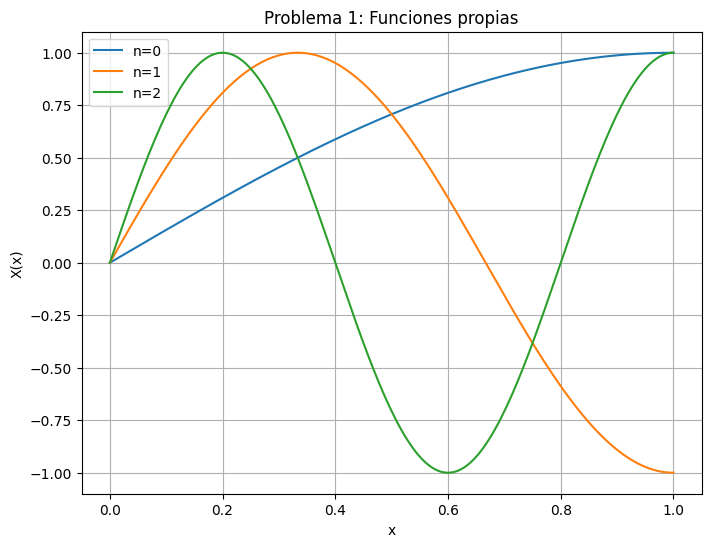

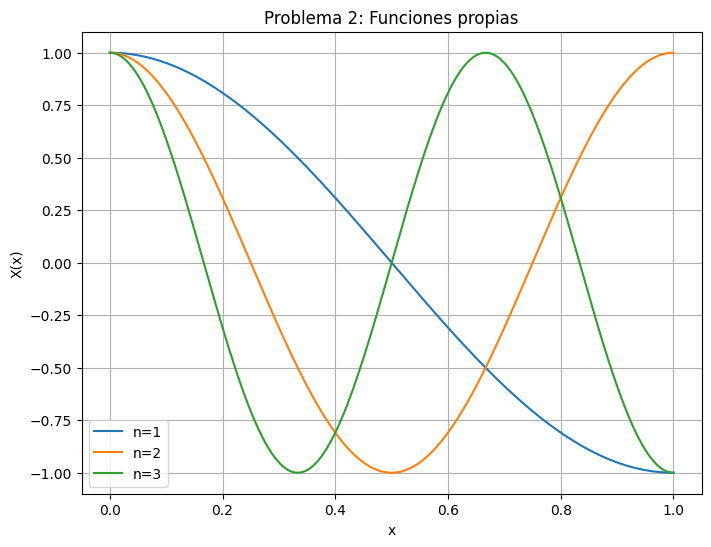

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definimos las variables simbólicas
x = sp.Symbol('x', real=True)
k = sp.Symbol('k', real=True, positive=True)
C1, C2 = sp.symbols('C1 C2')

# Solución general de la EDO: X'' + kX = 0
X_sol = C1 * sp.sin(sp.sqrt(k) * x) + C2 * sp.cos(sp.sqrt(k) * x)
X_prime = X_sol.diff(x)

# PROBLEMA 1: X(0) = 0, X'(1) = 0
print("Problema 1: X'' + kX = 0, X(0) = 0, X'(1) = 0")

# Condiciones de frontera
cond1 = sp.Eq(X_sol.subs(x, 0), 0)     # X(0) = 0 → C2 = 0
cond2 = sp.Eq(X_prime.subs({x: 1, C2: 0}), 0)  # X'(1) = 0

# Aplicamos C2 = 0 a la solución
X_sol_1 = X_sol.subs(C2, 0)
X_prime_1 = X_sol_1.diff(x)

# Sustituyendo en la segunda condición y resolviendo para k
eq_k1 = X_prime_1.subs(x, 1)
k_sol_1 = sp.solve(eq_k1, k)

# Valores propios (k_n = ((n + 1/2)π)^2)
k_values_1 = [((n + 0.5) * sp.pi)**2 for n in range(3)]
print("Valores propios (k) para el problema 1:", [float(k.evalf()) for k in k_values_1])

# Graficamos las primeras 3 funciones propias del problema 1
plt.figure(figsize=(8, 6))
x_vals = np.linspace(0, 1, 200)

for n, kn in enumerate(k_values_1):
    Xn_expr = X_sol_1.subs({k: kn, C1: 1})  # Normalizamos C1 = 1
    Xn_func = sp.lambdify(x, Xn_expr, 'numpy')
    plt.plot(x_vals, Xn_func(x_vals), label=f'n={n}')

plt.title("Problema 1: Funciones propias")
plt.xlabel("x")
plt.ylabel("X(x)")
plt.grid(True)
plt.legend()

# PROBLEMA 2: X'(0) = 0, X'(1) = 0
print("\nProblema 2: X'' + kX = 0, X'(0) = 0, X'(1) = 0")

# Derivada general de la solución
X_prime = X_sol.diff(x)

# Condiciones de frontera
cond3 = sp.Eq(X_prime.subs(x, 0), 0)  # X'(0) = 0 → C1 = 0
cond4 = sp.Eq(X_prime.subs({x: 1, C1: 0}), 0)  # X'(1) = 0

# Aplicamos C1 = 0
X_sol_2 = X_sol.subs(C1, 0)
X_prime_2 = X_sol_2.diff(x)

# Sustituyendo en la segunda condición y resolviendo para k
eq_k2 = X_prime_2.subs(x, 1)
k_sol_2 = sp.solve(eq_k2, k)

# Valores propios (k_n = (nπ)^2)
k_values_2 = [(n * sp.pi)**2 for n in range(1, 4)]  # n ≠ 0 porque da solución trivial
print("Valores propios (k) para el problema 2:", [float(k.evalf()) for k in k_values_2])

# Graficamos las primeras 3 funciones propias del problema 2
plt.figure(figsize=(8, 6))
for n, kn in enumerate(k_values_2):
    Xn_expr = X_sol_2.subs({k: kn, C2: 1})  # Normalizamos C2 = 1
    Xn_func = sp.lambdify(x, Xn_expr, 'numpy')
    plt.plot(x_vals, Xn_func(x_vals), label=f'n={n+1}')

plt.title("Problema 2: Funciones propias")
plt.xlabel("x")
plt.ylabel("X(x)")
plt.grid(True)
plt.legend()

plt.show()
